In [1]:
# Load libraries
import numpy as np
import math
from numpy import arange
from matplotlib import pyplot
%matplotlib inline
from pandas import read_csv
from pandas import set_option
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.metrics import make_scorer

In [2]:
#Load Dataset
dataset = read_csv('train_bikes.csv')
dataset.datetime = dataset.datetime.apply(pd.to_datetime)
dataset['year'] = dataset.datetime.apply(lambda x : x.year)
dataset['month'] = dataset.datetime.apply(lambda x : x.month)
dataset['hour'] = dataset.datetime.apply(lambda x : x.hour)
dataset['dayofweek'] = dataset.datetime.apply(lambda x : x.dayofweek)

In [3]:
# Prepare Data
Y = dataset['count'].values
Y = np.log(Y)
X = dataset[dataset.columns[1:].drop(['casual','registered','count'])].values
validation_size = 0.4
seed = 27
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)
print X_train.shape
print X_validation.shape

(6531L, 12L)
(4355L, 12L)


In [14]:
# Test options and evaluation metric
num_folds = 5
seed = 27
scoring1 = 'neg_mean_squared_error'
scoring2 = 'neg_mean_absolute_error'
scoring3 = 'r2'
def rmsle(y, y_preds): #define new metric
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_preds]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))
rmsle_scorer = make_scorer(rmsle, greater_is_better=False)#create scorer

In [5]:
# Evaluate Algorithms
# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('RIDGE', Ridge()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [6]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=rmsle_scorer)
    results.append(cv_results)
    names.append(name)
    rmsle = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(rmsle)

LR: -0.268945 (0.017580)
LASSO: -0.284852 (0.019090)
EN: -0.279281 (0.018531)
RIDGE: -0.268945 (0.017581)
KNN: -0.226128 (0.015326)
CART: -0.151184 (0.010000)
SVR: -0.269929 (0.021581)


In [7]:
# Standardize the dataset/StandardScaler
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=rmsle_scorer)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -0.268945 (0.017580)
ScaledLASSO: -0.356256 (0.019768)
ScaledEN: -0.334449 (0.020376)
ScaledKNN: -0.245575 (0.017221)
ScaledCART: -0.154556 (0.012115)
ScaledSVR: -0.241090 (0.017358)


In [8]:
# Standardize the dataset/MinMaxScaler
pipelinesM = []
pipelinesM.append(('ScaledLR', Pipeline([('Scaler', MinMaxScaler()),('LR', LinearRegression())])))
pipelinesM.append(('ScaledLASSO', Pipeline([('Scaler', MinMaxScaler()),('LASSO', Lasso())])))
pipelinesM.append(('ScaledEN', Pipeline([('Scaler', MinMaxScaler()),('EN', ElasticNet())])))
pipelinesM.append(('ScaledKNN', Pipeline([('Scaler', MinMaxScaler()),('KNN', KNeighborsRegressor())])))
pipelinesM.append(('ScaledCART', Pipeline([('Scaler', MinMaxScaler()),('CART', DecisionTreeRegressor())])))
pipelinesM.append(('ScaledSVR', Pipeline([('Scaler', MinMaxScaler()),('SVR', SVR())])))
resultsM = []
namesM = []
for name, model in pipelinesM:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=rmsle_scorer)
    resultsM.append(cv_results)
    namesM.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -0.268945 (0.017580)
ScaledLASSO: -0.356256 (0.019768)
ScaledEN: -0.356256 (0.019768)
ScaledKNN: -0.224350 (0.013779)
ScaledCART: -0.151433 (0.009275)
ScaledSVR: -0.264631 (0.018741)


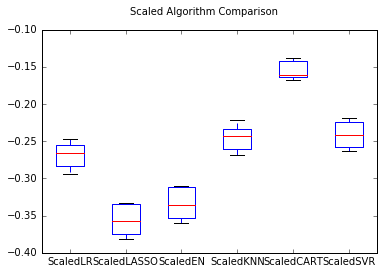

In [9]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

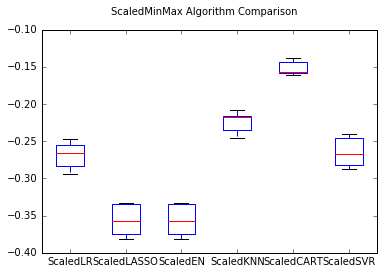

In [10]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('ScaledMinMax Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(resultsM)
ax.set_xticklabels(namesM)
pyplot.show()

In [11]:
# ensembles/Standard
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor(random_state=seed))])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor(random_state=seed))])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor(random_state=seed))])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor(random_state=seed))])))
results_ens = []
names_ens = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=rmsle_scorer)
    results_ens.append(cv_results)
    names_ens.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: -0.170170 (0.010538)
ScaledGBM: -0.125823 (0.010177)
ScaledRF: -0.118294 (0.007368)
ScaledET: -0.119599 (0.011145)


In [12]:
# ensembles/MinMax
ensemblesM = []
ensemblesM.append(('ScaledAB', Pipeline([('Scaler', MinMaxScaler()),('AB', AdaBoostRegressor(random_state=seed))])))
ensemblesM.append(('ScaledGBM', Pipeline([('Scaler', MinMaxScaler()),('GBM', GradientBoostingRegressor(random_state=seed))])))
ensemblesM.append(('ScaledRF', Pipeline([('Scaler', MinMaxScaler()),('RF', RandomForestRegressor(random_state=seed))])))
ensemblesM.append(('ScaledET', Pipeline([('Scaler', MinMaxScaler()),('ET', ExtraTreesRegressor(random_state=seed))])))
results_ensM = []
names_ensM = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=rmsle_scorer)
    results_ensM.append(cv_results)
    names_ensM.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: -0.170170 (0.010538)
ScaledGBM: -0.125823 (0.010177)
ScaledRF: -0.118294 (0.007368)
ScaledET: -0.119599 (0.011145)


In [15]:
ensembles[2][1].fit(X_train,Y_train)
preds = ensembles[2][1].predict(X_validation)
print rmsle(np.exp(Y_validation), np.exp(preds))

0.337386558628


In [16]:
# Tune scaled RF
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([500]),max_features = np.array([0.3,0.4,0.5,0.6,0.7,0.8]))
model = RandomForestRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=rmsle_scorer, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.112830 using {'max_features': 0.80000000000000004, 'n_estimators': 500}
-0.140486 (0.013480) with: {'max_features': 0.29999999999999999, 'n_estimators': 500}
-0.128279 (0.012411) with: {'max_features': 0.40000000000000002, 'n_estimators': 500}
-0.117461 (0.010356) with: {'max_features': 0.5, 'n_estimators': 500}
-0.114935 (0.009628) with: {'max_features': 0.59999999999999998, 'n_estimators': 500}
-0.113620 (0.009076) with: {'max_features': 0.69999999999999996, 'n_estimators': 500}
-0.112830 (0.008950) with: {'max_features': 0.80000000000000004, 'n_estimators': 500}


In [17]:
# Tune scaled RF
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([1000]),max_features = np.array([0.5,0.65,0.8]))
model = RandomForestRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=rmsle_scorer, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.112941 using {'max_features': 0.80000000000000004, 'n_estimators': 1000}
-0.117174 (0.010197) with: {'max_features': 0.5, 'n_estimators': 1000}
-0.114734 (0.009546) with: {'max_features': 0.65000000000000002, 'n_estimators': 1000}
-0.112941 (0.008981) with: {'max_features': 0.80000000000000004, 'n_estimators': 1000}


In [18]:
# Tune scaled RF
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([1000, 2000]), max_depth = np.array([20,50,100]), max_features = np.array([0.8]))
model = RandomForestRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=rmsle_scorer, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.112900 using {'max_features': 0.80000000000000004, 'n_estimators': 2000, 'max_depth': 50}
-0.113142 (0.009021) with: {'max_features': 0.80000000000000004, 'n_estimators': 1000, 'max_depth': 20}
-0.113030 (0.008957) with: {'max_features': 0.80000000000000004, 'n_estimators': 2000, 'max_depth': 20}
-0.112941 (0.008981) with: {'max_features': 0.80000000000000004, 'n_estimators': 1000, 'max_depth': 50}
-0.112900 (0.008968) with: {'max_features': 0.80000000000000004, 'n_estimators': 2000, 'max_depth': 50}
-0.112941 (0.008981) with: {'max_features': 0.80000000000000004, 'n_estimators': 1000, 'max_depth': 100}
-0.112900 (0.008968) with: {'max_features': 0.80000000000000004, 'n_estimators': 2000, 'max_depth': 100}


In [19]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = RandomForestRegressor(random_state=seed, n_estimators = 2000, max_depth = 50, max_features=0.8)
model.fit(rescaledX,Y_train)
rescaledValidationX = scaler.transform(X_validation)
preds = model.predict(rescaledValidationX)

print rmsle(np.exp(Y_validation), np.exp(preds))

0.311348806385


In [20]:
# Tune scaled GB
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators = np.array([500]), max_features = np.array([0.3,0.4,0.5,0.6,0.7,0.8]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=rmsle_scorer, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.109410 using {'max_features': 0.59999999999999998, 'n_estimators': 500}
-0.116914 (0.006679) with: {'max_features': 0.29999999999999999, 'n_estimators': 500}
-0.112845 (0.008878) with: {'max_features': 0.40000000000000002, 'n_estimators': 500}
-0.111343 (0.007354) with: {'max_features': 0.5, 'n_estimators': 500}
-0.109410 (0.007435) with: {'max_features': 0.59999999999999998, 'n_estimators': 500}
-0.111937 (0.007006) with: {'max_features': 0.69999999999999996, 'n_estimators': 500}
-0.110765 (0.008118) with: {'max_features': 0.80000000000000004, 'n_estimators': 500}


In [21]:
# Tune scaled GB
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(learning_rate=np.array([0.1, 0.15,0.2]), n_estimators = np.array([2000]), max_features = np.array([0.6]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=rmsle_scorer, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.111021 using {'max_features': 0.59999999999999998, 'n_estimators': 2000, 'learning_rate': 0.14999999999999999}
-0.112419 (0.009646) with: {'max_features': 0.59999999999999998, 'n_estimators': 2000, 'learning_rate': 0.10000000000000001}
-0.111021 (0.008331) with: {'max_features': 0.59999999999999998, 'n_estimators': 2000, 'learning_rate': 0.14999999999999999}
-0.112298 (0.008861) with: {'max_features': 0.59999999999999998, 'n_estimators': 2000, 'learning_rate': 0.20000000000000001}


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: RuntimeWarning: invalid value encountered in log


In [33]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators = 2500, learning_rate = 0.08,  max_features=0.5)
model.fit(rescaledX,Y_train)
rescaledValidationX = scaler.transform(X_validation)
preds = model.predict(rescaledValidationX)

print rmsle(np.exp(Y_validation), np.exp(preds))

0.285803478662


In [25]:
# Tune scaled ET
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([100, 250, 400, 700, 1000]))
model = ExtraTreesRegressor(random_state=seed, oob_score=True, bootstrap=True)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=rmsle_scorer, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.111439 using {'n_estimators': 700}
-0.112350 (0.009652) with: {'n_estimators': 100}
-0.111628 (0.010042) with: {'n_estimators': 250}
-0.111461 (0.010045) with: {'n_estimators': 400}
-0.111439 (0.010141) with: {'n_estimators': 700}
-0.111455 (0.010138) with: {'n_estimators': 1000}


In [27]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = ExtraTreesRegressor(random_state=seed, n_estimators = 700, oob_score=True, bootstrap=True)
model.fit(rescaledX,Y_train)
rescaledValidationX = scaler.transform(X_validation)
preds = model.predict(rescaledValidationX)

print rmsle(np.exp(Y_validation), np.exp(preds))

0.296937244423


In [61]:
#just a try ( ;-)
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = AdaBoostRegressor(random_state=seed,base_estimator = RandomForestRegressor(random_state=seed, n_estimators = 100, 
                         max_features=0.5), n_estimators = 50, learning_rate = 0.9)
model.fit(rescaledX,Y_train)
rescaledValidationX = scaler.transform(X_validation)
preds = model.predict(rescaledValidationX)

print rmsle(np.exp(Y_validation), np.exp(preds))

0.319779537097


In [34]:
test_dataset = read_csv('test_bikes.csv')
test_dataset.datetime = test_dataset.datetime.apply(pd.to_datetime)
test_dataset['year'] = test_dataset.datetime.apply(lambda x : x.year)
test_dataset['month'] = test_dataset.datetime.apply(lambda x : x.month)
test_dataset['hour'] = test_dataset.datetime.apply(lambda x : x.hour)
test_dataset['dayofweek'] = test_dataset.datetime.apply(lambda x : x.dayofweek)
X_test = test_dataset[test_dataset.columns[1:]].values
scaler_test = StandardScaler().fit(X)
rescaled_test = scaler_test.transform(X_test)

In [62]:
#this gave me the best result on leaderboard (0.39888)
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
model = GradientBoostingRegressor(random_state=seed, n_estimators = 2000, learning_rate = 0.09,  max_features=0.5)
model.fit(rescaledX,Y)
rescaledTestX = scaler.transform(X_test)
preds = model.predict(rescaledTestX)
preds = np.exp(preds)

In [48]:
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
model = RandomForestRegressor(random_state=seed, n_estimators = 2000, max_depth = 50, max_features=0.8)
model.fit(rescaledX,Y)
rescaledTestX = scaler.transform(X_test)
preds = model.predict(rescaledTestX)
preds = np.exp(preds)

In [51]:
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
model = ExtraTreesRegressor(random_state=seed,  n_estimators = 1500, oob_score=True, bootstrap=True)
model.fit(rescaledX,Y)
rescaledTestX = scaler.transform(X_test)
preds = model.predict(rescaledTestX)
preds = np.exp(preds)

In [58]:
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
model = AdaBoostRegressor(random_state=seed,base_estimator = GradientBoostingRegressor(random_state=seed, n_estimators = 100, 
                         max_features=0.5), n_estimators = 50, learning_rate = 0.9)
model.fit(rescaledX,Y)
rescaledTestX = scaler.transform(X_test)
preds = model.predict(rescaledTestX)
preds = np.exp(preds)

In [65]:
new_preds = preds
print preds[13]
for i in range(len(new_preds)):
    if math.modf(max(0, new_preds[i]))[0]>0.9:
        new_preds[i] = math.modf(max(0, new_preds[i]))[1]+1
submission = pd.DataFrame({
        "datetime": test_dataset["datetime"],
        "count": [x for x in new_preds]
    })
submission.head(15)

64.3972335106


,count,datetime
0,11.891941,2011-01-20 00:00:00
1,4.640564,2011-01-20 01:00:00
2,2.737563,2011-01-20 02:00:00
3,2.112728,2011-01-20 03:00:00
4,1.731296,2011-01-20 04:00:00
5,8.324127,2011-01-20 05:00:00
6,27.340020,2011-01-20 06:00:00
7,83.036308,2011-01-20 07:00:00
8,191.000000,2011-01-20 08:00:00
9,102.853476,2011-01-20 09:00:00


In [66]:
submission.to_csv('bike_predictions.csv', index=False)

In [56]:
AdaBoostRegressor?

In [67]:
ExtraTreesRegressor?

In [68]:
GradientBoostingRegressor?

In [69]:
RandomForestRegressor?